# Algorithmic Analysis for Value and Policy Iteration
Chapter 2 of [Algorithms for Sequential Decision Making](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.17.4565) ([Michael Littman](https://www.wikiwand.com/en/Michael_L._Littman)'s PhD thesis)

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Some intuition for geometric series

In [5]:
def series(discount_factor, n=1e6):
    assert 0 < discount_factor < 1, "Discount factor must be >0 and <1"
    return sum([discount_factor ** i for i in range(int(n))])

In [ ]:
betas = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

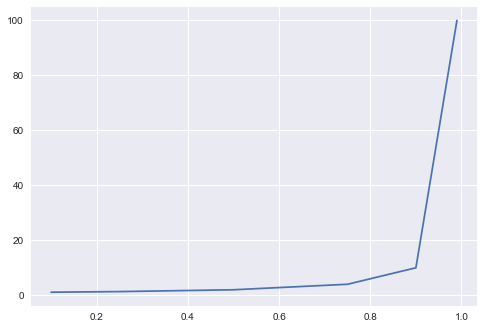

In [7]:
# By calculation
plt.plot(betas, [series(beta) for beta in betas]);

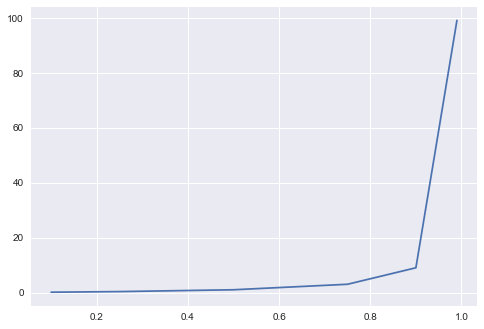

In [8]:
# By formula (beta / (1 - beta))
plt.plot(betas, [beta / (1 - beta) for beta in betas]);

### Value Iteration
> **Lemma 2.2** determining optimal infinite-horizon policy via value iteration takes a number of iterations proportional to $\frac{1}{1-\beta}log\frac{1}{1-\beta}$ in the worst case

<img src="resources/littman_figure2.2.png">

In [62]:
def action1(beta, t):
    return sum([-beta ** t for t in range(t)])

def action2(beta, t):
    return -beta ** 2 / (1 - beta)

In [92]:
betas = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
steps = 20

rows = []
for beta in betas:
    for step in range(steps):
        rows.append({
            'step': step,
            'beta': beta,
            'a1': action1(beta, step),
            'a2': action2(beta, step)
        })
        
df = pd.DataFrame(rows)
df_ = pd.melt(df, id_vars=['step', 'beta'])

At some step, depending on beta, we'll realize that $a_2$ is superior

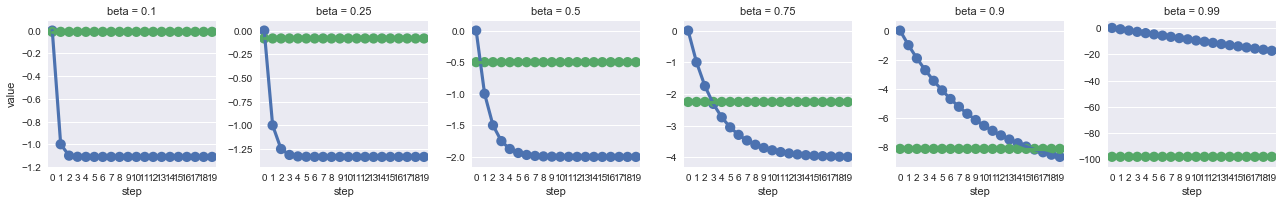

In [113]:
g = sns.FacetGrid(df_, col='beta', hue='variable', sharey=False)
g.map(sns.pointplot, 'step', 'value');

### Policy iteration
* There are $|A|^{|S|}$ distinct policies
* Each iteartion of PI strictly improves the approximation
* PI terminates in at most exponential number of steps!
* Each step of PI:
    * VI-like policy improvement with $O(|A||S|^{2})$
    * Policy evaluation $O(|S|^{3})$